# Millenium Galaxy Catalogue EDA

In [13]:
import pandas as pd

import astroFuncs as af

In [14]:
def get_mgc_data(filepath):
    #reading in the bright catalog and the clean faint catalog
    mgc_bright = pd.read_csv(filepath+"mgc_bright.txt",
    names=["ID","MGCFN","X_IMAGE","Y_IMAGE","MAG_ISO","MAG_ISO_DC","MAG_ISOCOR",
           "MAG_ISOCOR_DC","MAG_AUTO","MAG_AUTO_DC","B_MGC","B_MGC_DC","MAG_ERR",
           "BACKGRND","THRESH","ISOAREA_IMAGE","ALPHA_J2000","DELTA_J2000",
           "ALPHA_B1950","DELTA_B1950","A_IMAGE","B_IMAGE","THETA_IMAGE",
           "ERRA_IMAGE","ERRB_IMAGE","ISOAREA_WORLD","FLAGS","FWHM_IMAGE",
           "ELLIPTICITY","STEL","CCD","CLASS","QUALITY","HLRADIUS","INEXR"],
    delimiter=" ")
    
    mgc_faint = pd.read_csv(filepath+"mgc_faint.txt",
            names=["ID","MGCFN","X_IMAGE","Y_IMAGE","MAG_ISO","MAG_ISO_DC","MAG_ISOCOR",
           "MAG_ISOCOR_DC","MAG_AUTO","MAG_AUTO_DC","B_MGC","B_MGC_DC","MAG_ERR",
           "BACKGRND","THRESH","ISOAREA_IMAGE","ALPHA_J2000","DELTA_J2000",
           "ALPHA_B1950","DELTA_B1950","A_IMAGE","B_IMAGE","THETA_IMAGE",
           "ERRA_IMAGE","ERRB_IMAGE","ISOAREA_WORLD","FLAGS","FWHM_IMAGE",
           "ELLIPTICITY","STEL","CCD","CLASS"],
            delimiter=" ",
            on_bad_lines="skip") #skipping bad lines as there are abt 50 lines with a " " at the start making them hard to read
    #combine catalogs
    mgc_all = pd.concat([mgc_bright, mgc_faint])
    #return
    return mgc_all

### reading in data

In [15]:
filepath="/home/richard/work_placement/data/mgc_data/"

In [16]:
mgc_bright = pd.read_csv(filepath+"mgc_bright.txt",
            names=["ID","MGCFN","X_IMAGE","Y_IMAGE","MAG_ISO","MAG_ISO_DC","MAG_ISOCOR",
           "MAG_ISOCOR_DC","MAG_AUTO","MAG_AUTO_DC","B_MGC","B_MGC_DC","MAG_ERR",
           "BACKGRND","THRESH","ISOAREA_IMAGE","ALPHA_J2000","DELTA_J2000",
           "ALPHA_B1950","DELTA_B1950","A_IMAGE","B_IMAGE","THETA_IMAGE",
           "ERRA_IMAGE","ERRB_IMAGE","ISOAREA_WORLD","FLAGS","FWHM_IMAGE",
           "ELLIPTICITY","STEL","CCD","CLASS","QUALITY","HLRADIUS","INEXR"],
            delimiter=" ")


In [17]:
mgc_faint = pd.read_csv(filepath+"mgc_faint.txt",
            names=["ID","MGCFN","X_IMAGE","Y_IMAGE","MAG_ISO","MAG_ISO_DC","MAG_ISOCOR",
           "MAG_ISOCOR_DC","MAG_AUTO","MAG_AUTO_DC","B_MGC","B_MGC_DC","MAG_ERR",
           "BACKGRND","THRESH","ISOAREA_IMAGE","ALPHA_J2000","DELTA_J2000",
           "ALPHA_B1950","DELTA_B1950","A_IMAGE","B_IMAGE","THETA_IMAGE",
           "ERRA_IMAGE","ERRB_IMAGE","ISOAREA_WORLD","FLAGS","FWHM_IMAGE",
           "ELLIPTICITY","STEL","CCD","CLASS"],
            delimiter=" ",
            on_bad_lines="skip") #skipping bad lines as there are abt 50 lines with a " " at the start making them hard to read


MGC faint contains galaxies (class 1), stars (class 8), noise (14) and obsolete detections (15). Visually checking cutouts of these before deciding what classes to use for a "clean catalog"

KeyboardInterrupt: 

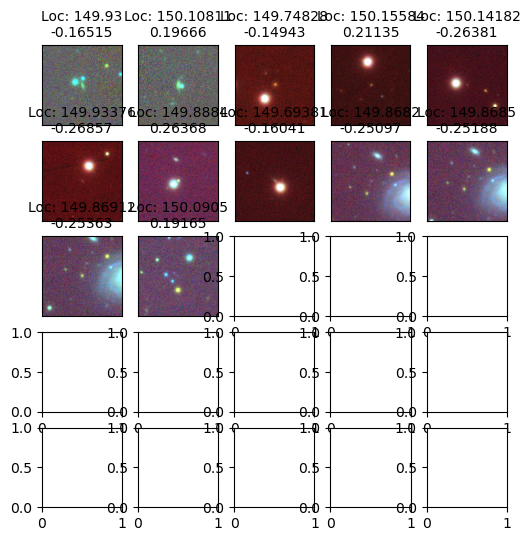

In [18]:
af.plot_cutouts(mgc_faint.query("CLASS==1").ALPHA_J2000, mgc_faint.query("CLASS==1").DELTA_J2000, nrows=5, ncols=5)
print("These are galaxies")

In [ ]:
af.plot_cutouts(mgc_faint.query("CLASS==8").ALPHA_J2000, mgc_faint.query("CLASS==8").DELTA_J2000, nrows=5, ncols=5)
print("These are stars")

In [ ]:
af.plot_cutouts(mgc_faint.query("CLASS==14").ALPHA_J2000, mgc_faint.query("CLASS==14").DELTA_J2000, nrows=5, ncols=5)
print("These are other (noise)")

In [ ]:
af.plot_cutouts(mgc_faint.query("CLASS==15").ALPHA_J2000, mgc_faint.query("CLASS==15").DELTA_J2000, nrows=5, ncols=5)
print("These are obsolete (replpaced by another entry)")

Happy to use only galaxy classification as the classifications look accurate